In [1]:
import sys
sys.path.append('../')
import logging

import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lstm_mobility_model.two_layer_latlng_location import TwoLayerLstmModelBuilder
from lstm_mobility_model.load import DataPreprocessor

logger = logging.getLogger()
logger.setLevel(logging.INFO)

%matplotlib inline

### Data Preprocessing

In [2]:
def preprocess_data(dataframe):
    processor = DataPreprocessor()
    return processor.preprocess_traces_to_dict(dataframe)

dataframe = pd.read_csv('../sample_data/sample_data_0.csv')
preprocessed_data = preprocess_data(dataframe)

### LSTM mobility model

In [3]:
lstm_model = \
    TwoLayerLstmModelBuilder(
        model_path='lstm_model_weights/',
        model_name='two_layer_categorical_location',
        learning_rate=0.01,
        training_epochs=1000,
        lstm_dropout=0.0,
        lstm_units=16,
        number_of_mixtures=40,
        sampling_bias=0.0)

In [4]:
lstm_model.train(preprocessed_data,
                 batch_size=100)

INFO:root:Epoch: 100 Loss: [  4.3427057 -22.658133 ]
INFO:root:Epoch: 200 Loss: [  2.6329496 -40.425007 ]
INFO:root:Epoch: 300 Loss: [  2.0191128 -42.27963  ]
INFO:root:Epoch: 400 Loss: [  1.5961597 -48.27694  ]
INFO:root:Epoch: 500 Loss: [  1.3852612 -51.632248 ]
INFO:root:Epoch: 600 Loss: [  1.2561041 -54.401836 ]
INFO:root:Epoch: 700 Loss: [  1.1560509 -55.232548 ]
INFO:root:Epoch: 800 Loss: [  1.0856735 -56.66521  ]
INFO:root:Epoch: 900 Loss: [  1.0438473 -57.086002 ]
INFO:root:Epoch: 1000 Loss: [  1.0092837 -58.01385  ]
INFO:root:Saved model to lstm_model_weights/two_layer_categorical_location


In [5]:
generated_traces = lstm_model.generate(
    preprocessed_data,
    method='complete')
generated_traces_df = pd.concat(list(generated_traces.values()))

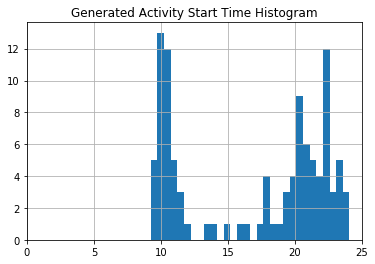

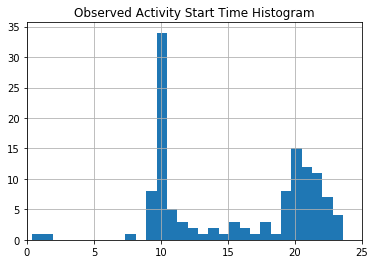

In [6]:
_ = plt.figure()
_ = generated_traces_df[generated_traces_df['start_hour_since_day'] != 0][
    'start_hour_since_day'].hist(bins=30)
_ = plt.title('Generated Activity Start Time Histogram')
_ = plt.xlim(0, 25)

_ = plt.figure()
_ = dataframe[dataframe['start_hour_since_day'] != 0][
    'start_hour_since_day'].hist(bins=30)
_ = plt.title('Observed Activity Start Time Histogram')
_ = plt.xlim(0, 25)

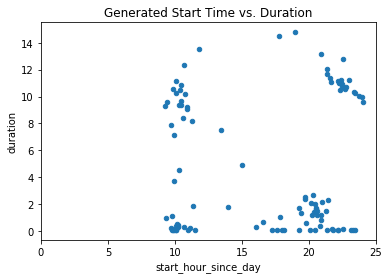

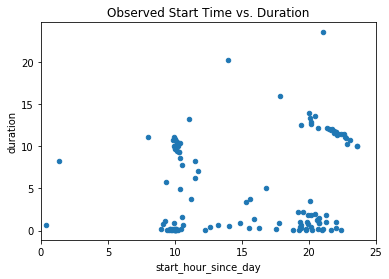

In [7]:
_ = generated_traces_df[generated_traces_df['start_hour_since_day'] != 0].plot.scatter(
    x='start_hour_since_day',
    y='duration')
_ = plt.title('Generated Start Time vs. Duration')
_ =plt.xlim(0, 25)

_ = dataframe[dataframe['start_hour_since_day'] != 0].plot.scatter(
    x='start_hour_since_day',
    y='duration')
_ = plt.title('Observed Start Time vs. Duration')
_ = plt.xlim(0, 25)

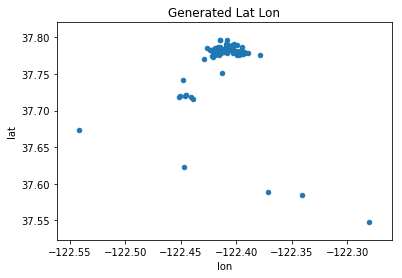

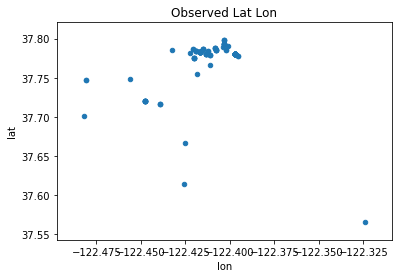

In [8]:
_ = generated_traces_df[generated_traces_df['start_hour_since_day'] != 0].plot.scatter(
    x='lon',
    y='lat')
_ = plt.title('Generated Lat Lon')

_ = dataframe[dataframe['start_hour_since_day'] != 0].plot.scatter(
    x='lon',
    y='lat')
_ = plt.title('Observed Lat Lon')